In [1]:
!apt-get install graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


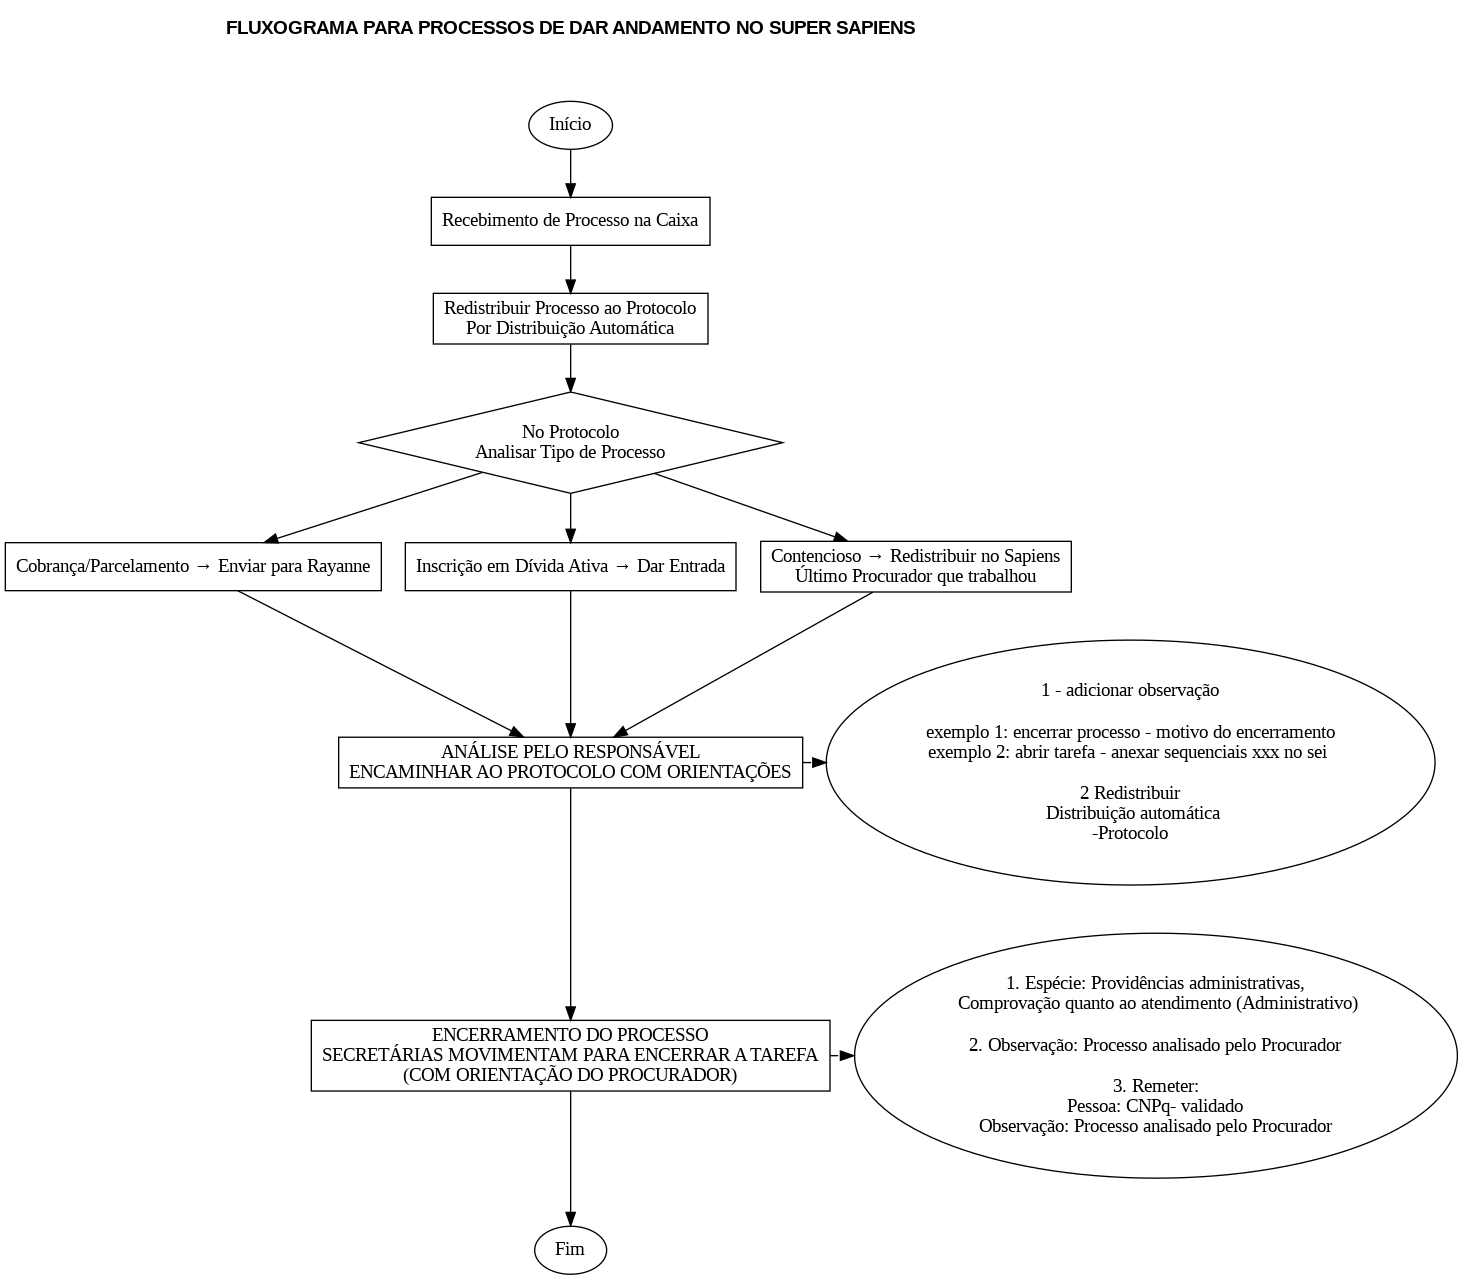

In [57]:
from graphviz import Digraph
dot = Digraph(format='png')

# Título do Fluxograma
dot.node('Titulo', 'FLUXOGRAMA PARA PROCESSOS DE DAR ANDAMENTO NO SUPER SAPIENS', shape='plaintext', fontname='Arial Bold')
dot.edge('Titulo', 'Inicio', style='invis')

# Mantém os nós no mesmo nível
dot.attr(rankdir="TB")  # Mantém o fluxo de cima para baixo

# Adicionar nós ao fluxograma
dot.node('Inicio', 'Início', shape='oval')
dot.node('Recebimento', 'Recebimento de Processo na Caixa', shape='rectangle')
dot.node('Redistribuir', 'Redistribuir Processo ao Protocolo\nPor Distribuição Automática', shape='rectangle')
dot.node('Protocolo', 'No Protocolo\nAnalisar Tipo de Processo', shape='diamond')
dot.node('Caso1', 'Cobrança/Parcelamento → Enviar para Rayanne', shape='rectangle')
dot.node('Caso2', 'Inscrição em Dívida Ativa → Dar Entrada', shape='rectangle')
dot.node('Caso3', 'Contencioso → Redistribuir no Sapiens\nÚltimo Procurador que trabalhou', shape='rectangle')

# Criando o nó principal da etapa "Encaminhar ao protocolo"
dot.node('AnaliseResp', 'ANÁLISE PELO RESPONSÁVEL\nENCAMINHAR AO PROTOCOLO COM ORIENTAÇÕES', shape='rectangle')

dot.node('Obs', '1 - adicionar observação\n\nexemplo 1: encerrar processo - motivo do encerramento\nexemplo 2: abrir tarefa - anexar sequenciais xxx no sei \n\n2 Redistribuir\n Distribuição automática\n-Protocolo', shape='ellipse')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('AnaliseResp')
    s.node('Obs')

dot.edge('AnaliseResp', 'Obs', style="dashed", constraint="false")

# Criando o nó principal da etapa "Encerramento do processo"
dot.node('Encerramento', 'ENCERRAMENTO DO PROCESSO\nSECRETÁRIAS MOVIMENTAM PARA ENCERRAR A TAREFA\n(COM ORIENTAÇÃO DO PROCURADOR)', shape='rectangle')

dot.node('EncerramentoObs', '1. Espécie: Providências administrativas,\n Comprovação quanto ao atendimento (Administrativo)\n\n2. Observação: Processo analisado pelo Procurador\n\n3. Remeter:\nPessoa: CNPq- validado\nObservação: Processo analisado pelo Procurador', shape='ellipse')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('Encerramento')
    s.node('EncerramentoObs')

dot.edge('Encerramento', 'EncerramentoObs', style="dashed", constraint="false")

# Conectar o "Encerramento" diretamente ao "Fim"
dot.node('Fim', 'Fim', shape='oval')

# Conectar os nós
dot.edge('Inicio', 'Recebimento')
dot.edge('Recebimento', 'Redistribuir')
dot.edge('Redistribuir', 'Protocolo')
dot.edge('Protocolo', 'Caso1')
dot.edge('Protocolo', 'Caso2')
dot.edge('Protocolo', 'Caso3')
dot.edge('Caso1', 'AnaliseResp')
dot.edge('Caso2', 'AnaliseResp')
dot.edge('Caso3', 'AnaliseResp')
dot.edge('AnaliseResp', 'Encerramento')
dot.edge('Encerramento', 'Fim')

# Salvar e exibir o fluxograma
dot.render('/content/fluxograma_sapiens')
from IPython.display import Image
Image('/content/fluxograma_sapiens.png')
